In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Data exploration and evaluation

In [16]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [149]:
df['Sex_binary'] = df['Sex'] == 'female'

### Values for Ages, Cabins and Embarked are missing 

In [117]:
def isnan(x):
    try:
        return np.isnan(x)
    except TypeError:
        return False

In [146]:
df.applymap(isnan).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_binary       0
dtype: int64

In [147]:
cols = ['Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Sex_binary']

- fare - ticket prize
- parch


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c13e72ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3c102aac18>]], dtype=object)

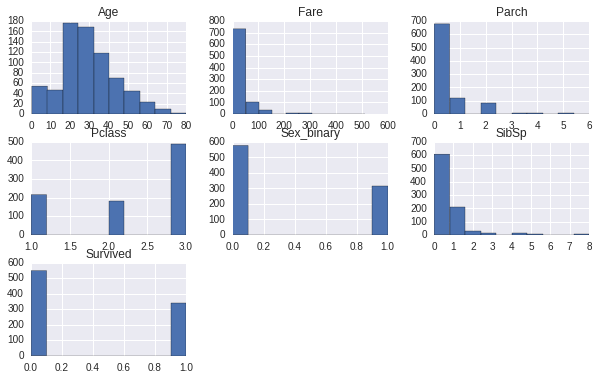

In [148]:
df[cols].hist(figsize=[10, 6])

## Metrics

In [8]:
import sklearn.metrics as skm

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [89]:
def metric(y_true, y_pred):
    conf_mat = skm.confusion_matrix(y_true, y_pred, labels=[1, 0])
    f1 = skm.f1_score(y_true, y_pred, labels=[1, 0])
    res = {'F1 score': f1, 'confusion matrix': conf_mat}
    for k, v in res.items():
        print(k+'\n')
        print(v)
        print()
    return res

In [90]:
metric(df['Survived'], df['Sex'] == 'female');

F1 score

0.710365853659

confusion matrix

[[233 109]
 [ 81 468]]



## Output format for submission

In [101]:
def to_result(y_pred, test_df, fname):
    """Takes y_pred pandas series with True/False values (Survived/Not-Survived)
    and writes with 1/0 to csv for kaggle submission.
    
    y_pred  - prediction of test set, pandas.Series with True/False
    test_df - test data, pandas.DataFrame
    fname   - file name of the output
    """
    assert len(y_pred) == len(test_df)
   
    y_pred_01 = y_pred.apply(lambda x: 1 if x else 0)
    assert (y_pred_01[y_pred] == 1).all()
    assert (y_pred_01[~y_pred] == 0).all()
    
    df = pd.DataFrame(
        {'PassengerId': test_df['PassengerId'], 'Survived': y_pred_01})
    df.to_csv(fname, delimiter=',', index=False)

# Gender model

In [6]:
sex_groups = df.groupby('Sex')

In [7]:
sex_groups.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Sex                                                                         
female count  261.000000  314.000000  314.000000   314.000000  314.000000   
       mean    27.915709   44.479818    0.649682   431.028662    2.159236   
       std     14.110146   57.997698    1.022846   256.846324    0.857290   
       min      0.750000    6.750000    0.000000     2.000000    1.000000   
       25%     18.000000   12.071875    0.000000   231.750000    1.000000   
       50%     27.000000   23.000000    0.000000   414.500000    2.000000   
       75%     37.000000   55.000000    1.000000   641.250000    3.000000   
       max     63.000000  512.329200    6.000000   889.000000    3.000000   
male   count  453.000000  577.000000  577.000000   577.000000  577.000000   
       mean    30.726645   25.523893    0.235702   454.147314    2.389948   
       std     14.678201   43.138263    0.612294   257.486139    0.813580   
       min      0.420000    0.000000    0.000000     1.000000    1.000000   
       25%     21.000000    7.895800    0.000000   222.000000    2.000000   
       50%     29.000000   10.500000    0.000000   464.000000    3.000000   
       75%     39.000000   26.550000    0.000000   680.000000    3.000000   
       max     80.000000  512.329200    5.000000   891.000000    3.000000   

                   SibSp    Survived  
Sex                                   
female count  314.000000  314.000000  
       mean     0.694268    0.742038  
       std      1.156520    0.438211  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000  
male   count  577.000000  577.000000  
       mean     0.429809    0.188908  
       std      1.061811    0.391775  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    0.000000  
       max      8.000000    1.000000

In [33]:
females_survives = (test_df['Sex'] == 'female')
females_survives[:10]

0    False
1     True
2    False
3    False
4     True
5    False
6     True
7    False
8     True
9    False
Name: Sex, dtype: bool

In [60]:
gendermodel_df = pd.read_csv('gendermodel.csv')

In [62]:
(females_survives_df - gendermodel_df).describe()

,PassengerId,Survived
count,418,418
mean,0,0
std,0,0
min,0,0
25%,0,0
50%,0,0
75%,0,0
max,0,0


In [99]:
to_result(females_survives, test_df, 'females_survives.csv')